In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
import os
print(os.listdir('/Users/mr_lurie/dynastytrial'))

['.DS_Store', 'Draft_Rounds.csv', 'Dynasty_Data.csv', 'FF_Data.csv', 'FF_Data_Extended.csv', 'sleeper1.csv', 'testfile.csv']


In [3]:
# the "encoding = "ISO-8859-1").fillna(0)" part after the csv path takes all empty data fields
# and sets them to zero. That way , missing values won't return errors. Before implementing
# this code for my data frame, all of the missing values for the forty times would appear as 
# "nan" which is not good for your data analysis. 
dyno = pd.read_csv('/Users/mr_lurie/dynastytrial/FF_Data_Extended.csv', encoding = "ISO-8859-1").fillna(0)
dyno['PPG'] = dyno['Stats'] / dyno['Games']

In [4]:
dyno.head(30)

,Player,Value,Stats,Games,Age,Draft_Year,Position,Round,Pick,Forty,Salary,Snaps,Targets,YAC,PPG
0,Christian McCaffrey,10232,415,16,24.0,2017.0,RB,1.0,8.0,4.480,4.31,0.9130,124.0,845.0,25.937500
1,Saquon Barkley,9994,219,13,23.3,2018.0,RB,1.0,2.0,4.400,7.80,0.8296,121.0,768.0,16.846154
2,Michael Thomas,9808,299,16,27.2,2016.0,WR,2.0,16.0,4.595,19.25,0.8839,147.0,536.0,18.687500
3,Ezekiel Elliott,9292,285,16,24.9,2016.0,RB,1.0,4.0,4.470,15.00,0.8271,95.0,576.0,17.812500
4,Alvin Kamara,9184,204,14,23.9,2017.0,RB,3.0,3.0,4.530,0.96,0.6261,105.0,642.0,14.571429
5,Dalvin Cook,8866,262,14,24.8,2017.0,RB,2.0,9.0,4.525,1.59,0.4672,49.0,384.0,18.714286
6,DeAndre Hopkins,8721,218,15,28.0,2013.0,WR,1.0,27.0,4.595,16.20,0.9909,163.0,415.0,14.533333
7,Davante Adams,8619,171,12,27.4,2014.0,WR,2.0,21.0,4.560,14.50,0.8873,169.0,472.0,14.250000
8,Tyreek Hill,8599,161,12,26.2,2016.0,WR,5.0,28.0,4.340,18.00,0.8660,137.0,570.0,13.416667
9,Chris Godwin,8262,242,14,24.3,2017.0,WR,3.0,20.0,4.420,0.82,0.6430,95.0,257.0,17.285714


In [5]:
TEs = dyno[dyno.Position == 'TE']
RBs = dyno[dyno.Position == 'RB']
WRs = dyno[dyno.Position == 'WR']
QBs = dyno[dyno.Position == 'QB']

In [6]:
what_round = TEs.groupby("Round").size()
what_round
# Need to fix the snap column. does not look accurate. also need to add in missing forty times

Round
0.0    2
1.0    8
2.0    8
3.0    6
4.0    4
5.0    1
6.0    1
dtype: int64

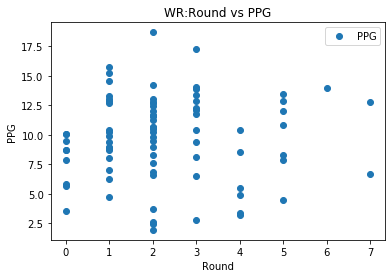

In [7]:
WRs.plot(x='Round', y='PPG', style='o')
plt.title('WR:Round vs PPG')
plt.xlabel('Round')
plt.ylabel('PPG')
plt.show()

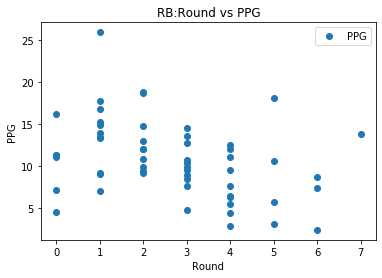

In [8]:
RBs.plot(x='Round', y='PPG', style='o')
plt.title('RB:Round vs PPG')
plt.xlabel('Round')
plt.ylabel('PPG')
plt.show()

In [9]:
# now I am going to use the pearson correlation coefficient . this is calculated by dividing 
# the covariance of the variables by their standard deviation . the values produced range 
# from -1 to 1. 1 is perfect positive linear correlation, 0 is no linear correlation, and -1 
# a perfect negative linear correlation
dyno_pos = dyno[dyno['Position'] == 'RB']
dyno_pos.corr()

,Value,Stats,Games,Age,Draft_Year,Round,Pick,Forty,Salary,Snaps,Targets,YAC,PPG
Value,1.000000,0.749130,0.185285,-0.067509,0.100798,-0.312470,-0.239540,0.001836,0.204077,0.431808,0.450325,0.513781,0.775290
Stats,0.749130,1.000000,0.488633,0.054277,-0.032005,-0.327122,-0.242640,0.239120,0.312420,0.501938,0.456289,0.520837,0.939175
Games,0.185285,0.488633,1.000000,0.097839,-0.009610,-0.059639,-0.293674,-0.106234,0.138971,0.083836,0.121765,0.125900,0.181245
Age,-0.067509,0.054277,0.097839,1.000000,0.807910,-0.181201,0.056750,0.195316,-0.003295,0.264815,0.149631,0.151758,0.022667
Draft_Year,0.100798,-0.032005,-0.009610,0.807910,1.000000,-0.101557,0.143672,-0.071207,-0.212191,0.141049,0.112427,0.120897,-0.038408
Round,-0.312470,-0.327122,-0.059639,-0.181201,-0.101557,1.000000,0.476927,-0.137673,-0.255428,-0.129310,-0.129598,-0.219051,-0.357075
Pick,-0.239540,-0.242640,-0.293674,0.056750,0.143672,0.476927,1.000000,-0.114485,-0.192427,-0.158198,-0.192722,-0.225156,-0.188330
Forty,0.001836,0.239120,-0.106234,0.195316,-0.071207,-0.137673,-0.114485,1.000000,0.071297,0.470501,0.371373,0.332184,0.306367
Salary,0.204077,0.312420,0.138971,-0.003295,-0.212191,-0.255428,-0.192427,0.071297,1.000000,0.359126,0.307381,0.314169,0.298095
Snaps,0.431808,0.501938,0.083836,0.264815,0.141049,-0.129310,-0.158198,0.470501,0.359126,1.000000,0.874000,0.854094,0.539379


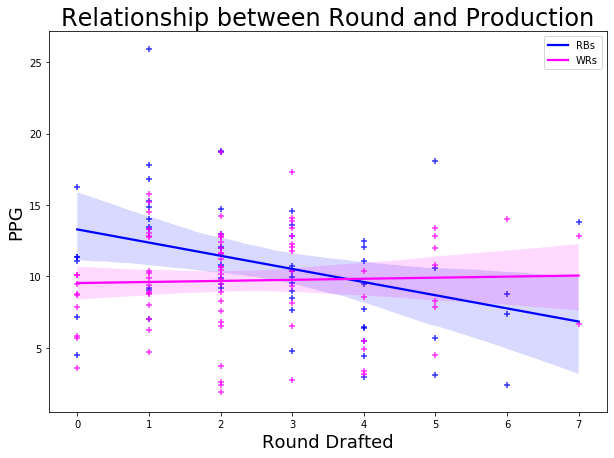

In [13]:
import seaborn as sns

# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=RBs.Round, y=RBs.PPG, color='blue', marker='+')
sns.regplot(x=WRs.Round, y=WRs.PPG, color='magenta', marker='+')

# Legend, title and labels.
plt.legend(labels=['RBs', 'WRs'])
plt.title('Relationship between Round and Production', size=24)
plt.xlabel('Round Drafted', size=18)
plt.ylabel('PPG', size=18);

In [16]:
# Exploratory Data Analysis on this data:

# Descriptive statistics RBs
statistics_RBs = dyno[dyno['Position'] == 'RB'].describe()
statistics_RBs.rename(columns=lambda x: x + '_RBs', inplace=True)

# Descriptive statistics WRs
statistics_WRs = dyno[dyno['Position'] == 'WR'].describe()
statistics_WRs.rename(columns=lambda x: x + '_WRs', inplace=True)

# Dataframe that contains statistics for both RBs and WRs
statistics = pd.concat([statistics_RBs], axis=1)
statistics

,Value_RBs,Stats_RBs,Games_RBs,Age_RBs,Draft_Year_RBs,Round_RBs,Pick_RBs,Forty_RBs,Salary_RBs,Snaps_RBs,Targets_RBs,YAC_RBs,PPG_RBs
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.00000,56.000000,56.000000
mean,2341.196429,152.089286,13.839286,24.896429,1980.642857,2.660714,15.910714,3.709643,2.708393,0.331802,36.12500,218.517857,10.837374
std,3082.693235,75.697791,2.606124,4.169149,269.495922,1.760958,12.324811,1.746416,3.603260,0.254404,34.78561,220.693122,4.543484
min,23.000000,29.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.416667
25%,169.250000,90.750000,13.000000,23.575000,2015.000000,1.000000,5.500000,4.427500,0.737500,0.084000,7.00000,34.250000,7.671875
50%,695.500000,142.500000,15.000000,24.850000,2017.000000,3.000000,12.500000,4.500000,1.120000,0.347050,26.50000,161.500000,10.675000
75%,3192.500000,194.500000,16.000000,26.325000,2018.000000,4.000000,26.250000,4.550000,2.717500,0.481800,53.50000,340.000000,13.492857
max,10232.000000,415.000000,16.000000,35.200000,2019.000000,7.000000,42.000000,4.660000,15.000000,0.913000,124.00000,845.000000,25.937500
